In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import Data

In [238]:
data = pd.read_csv('../Measurements/disp_latency/s05_120318.csv')

In [239]:
data['Time'].max() / 1000000

343.719616

In [240]:
data.index = data.Time/1000

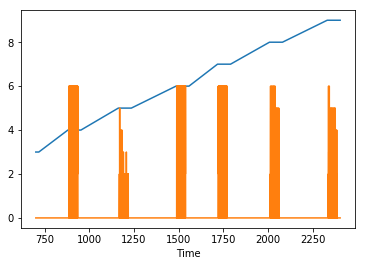

In [245]:
data['Trial'][700:2500].plot()
data['Chan1'][700:2500].plot()

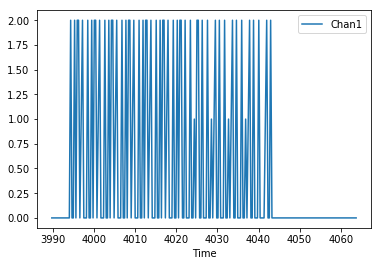

In [246]:
data[data.Trial == 15].plot(y='Chan1')

c:\users\sirotalab\miniconda3\envs\vrlatency\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


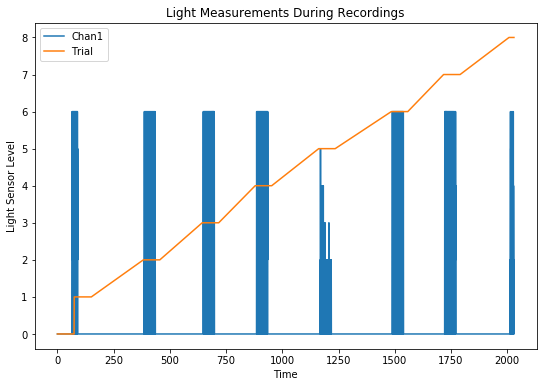

In [247]:
(data
  .iloc[:2000].plot(y=['Chan1', 'Trial'], figsize=(9, 6))
  .set(ylabel='Light Sensor Level',
       title='Light Measurements During Recordings')
);

## Trial Time

For latency measurement, we'll need time since th trial startet

In [248]:
data['TrialTime'] = data.groupby('Trial').Time.apply(lambda x: x - x.min())
# data[data.Trial == 16]

## Onset Detection

In [249]:
resp_on = data[(data['Chan1'] != 0) & (data['Trial'] != 0)]

In [250]:
latency = resp_on.groupby('Trial').TrialTime.min()

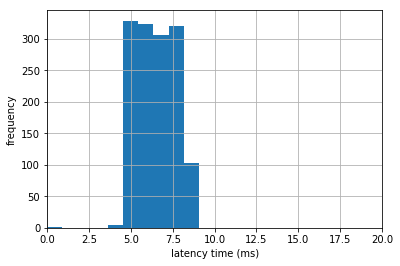

In [253]:
(latency / 1000).hist(bins=10).set(xlabel='latency time (ms)', ylabel='frequency')
plt.xlim([0, 20])
plt.show()

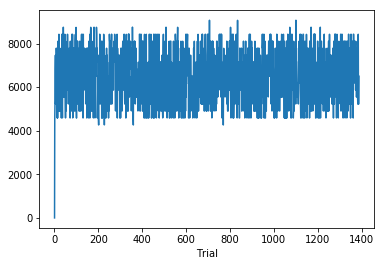

In [254]:
latency.plot()

## Why are we getting zeros?

Let's find the trials that have 0 TrialTime

In [255]:
resp_on[resp_on['TrialTime'] == 0]

,Time,Chan1,Trial,TrialTime
Time,,,,
74.464,74464,6,1,0
